In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
%matplotlib inline
dataset=pd.read_csv("1.csv",parse_dates=["date"],dayfirst=True)
dataset.info
dataset.shape


(35060, 8)

In [ ]:
from datetime import datetime,date,time
dataset.dropna()

,date,hour,time,purchase bid,sell bid,mcv,fsv,mcp
0,2021-01-01,1,0:00,5757.4,13513.0,4262.7,4262.7,2301.03
1,2021-01-01,1,0:15,5877.1,14487.5,4592.7,4592.7,2300.12
2,2021-01-01,1,0:30,5926.4,15368.5,4679.5,4679.5,2298.10
3,2021-01-01,1,0:45,5956.8,16043.9,4763.1,4763.1,2243.24
4,2021-01-01,2,1:00,6330.8,17019.0,5225.8,5225.8,2131.71
...,...,...,...,...,...,...,...,...
35055,2021-12-31,24,23:15,6044.6,17857.0,4794.5,4794.5,1999.99
35056,2021-12-31,24,23:30,6045.3,18258.6,4805.1,4805.1,1999.85
35057,2021-12-31,24,23:45,6066.3,18787.2,4826.1,4826.1,1999.58
35058,2021-12-31,24,23:45,6066.3,18787.2,4826.1,4826.1,1999.58


In [ ]:
for i in range(0,dataset['time'].size):
    dataset.loc[i,'time']=datetime.strptime(dataset.loc[i,'time'], '%H:%M').time()

In [ ]:
for i in range (0,dataset['time'].size) :
    dataset.loc[i,'days']=pd.Timestamp.combine((dataset.loc[i,'date']),(dataset.loc[i,'time']))

In [ ]:
dataset

,date,hour,time,purchase bid,sell bid,mcv,fsv,mcp,days
0,2021-01-01,1,00:00:00,5757.4,13513.0,4262.7,4262.7,2301.03,2021-01-01 00:00:00
1,2021-01-01,1,00:15:00,5877.1,14487.5,4592.7,4592.7,2300.12,2021-01-01 00:15:00
2,2021-01-01,1,00:30:00,5926.4,15368.5,4679.5,4679.5,2298.10,2021-01-01 00:30:00
3,2021-01-01,1,00:45:00,5956.8,16043.9,4763.1,4763.1,2243.24,2021-01-01 00:45:00
4,2021-01-01,2,01:00:00,6330.8,17019.0,5225.8,5225.8,2131.71,2021-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...
35055,2021-12-31,24,23:15:00,6044.6,17857.0,4794.5,4794.5,1999.99,2021-12-31 23:15:00
35056,2021-12-31,24,23:30:00,6045.3,18258.6,4805.1,4805.1,1999.85,2021-12-31 23:30:00
35057,2021-12-31,24,23:45:00,6066.3,18787.2,4826.1,4826.1,1999.58,2021-12-31 23:45:00
35058,2021-12-31,24,23:45:00,6066.3,18787.2,4826.1,4826.1,1999.58,2021-12-31 23:45:00


In [ ]:
dataset.dropna(inplace=True)


In [ ]:
dataset=dataset.set_index('days')
dataset=dataset.drop(['time'],axis=1)
dataset=dataset.resample('1H').mean()

<ipython-input-103-c9eda3985d96>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset=dataset.resample('1H').mean()


In [ ]:
dataset

,hour,purchase bid,sell bid,mcv,fsv,mcp
days,,,,,,
2021-01-01 00:00:00,1.0,5879.425000,14853.225000,4574.500000,4574.500000,2285.6225
2021-01-01 01:00:00,2.0,6260.400000,17975.975000,5217.875000,5217.875000,2097.2125
2021-01-01 02:00:00,3.0,6269.075000,19207.300000,5314.525000,5314.525000,2008.1925
2021-01-01 03:00:00,4.0,6422.875000,19390.600000,5471.725000,5471.725000,2008.3225
2021-01-01 04:00:00,5.0,6941.500000,19539.450000,5974.500000,5974.500000,2038.7250
...,...,...,...,...,...,...
2021-12-31 19:00:00,20.0,10584.975000,9578.300000,8355.107500,8355.107500,4325.2825
2021-12-31 20:00:00,21.0,8082.525000,10278.075000,6821.060000,6821.060000,3707.3575
2021-12-31 21:00:00,22.0,6482.650000,11622.300000,5307.147500,5307.147500,3012.5650


<Axes: xlabel='days'>

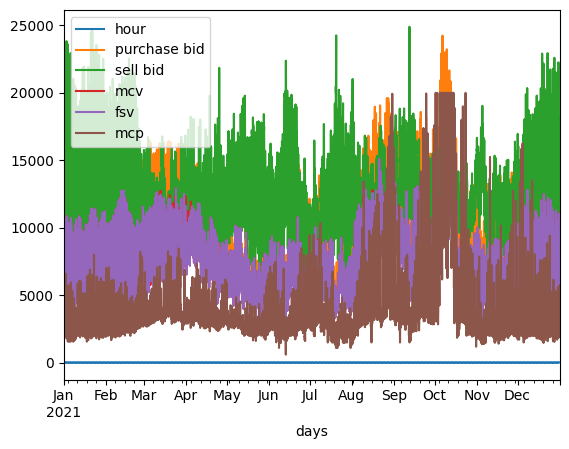

In [ ]:
dataset.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(dataset['mcp'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(mcp):
    result=adfuller(mcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

In [ ]:
adfuller_test(dataset['mcp'])

ADF Test Statistic : -4.009865161378962
p-value : 0.0013597262546974434
#Lags Used : 31
Number of Observations Used : 8728
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


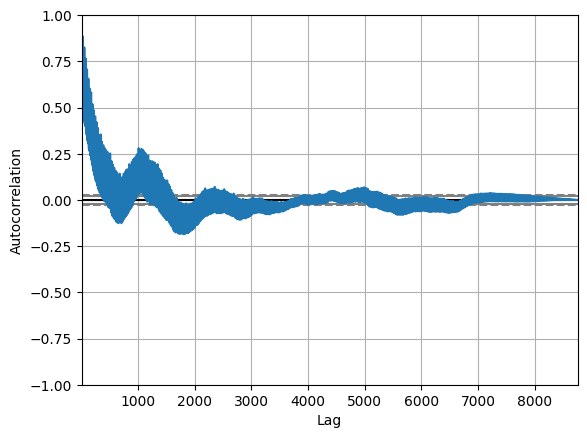

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataset['mcp'])
plt.show()

In [ ]:
from google.colab import files
dataset.to_csv('updated_dataset.csv', index=False)
files.download('updated_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>